# Hashtag Analysis, Hashtag Text Mining, and Hashtag Sentiment Analysis on a Car Race

### Task

Reaching and graphically visualizing/categorizing the details of the hashtags 

Text Mining: Finding and visualizing most frequent words of #GEICO500 on car race cup 

Sentiment analysis of the tweets in #GEICO500

### Importing Necessary Libraries

In [1]:
import tweepy, codecs
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word, TextBlob
#nltk.download('wordnet')
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Getting Rid of Filter Warnings

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Prerequisite

For performing the following analyses, one must have at least an autorized **"Developer Account"** on twitter with **"Elevated"** access.

To open a developer acoount, visit:

https://developer.twitter.com/

### API Connection

Enter the following keys constructed for the project on your Developer Account.

In [3]:
api_key = 'pCfJItzgx2mjbuFnNpzn1deMJ'
api_key_secret = 'K10AdTSM16NSdZtB98KJnrv5rO5RjDPaIS4roQYkr7axYfjYTO'
access_token = '1517455970263257103-bQ0qhvCMfxKBIN8MFcPWm0IKpsYO4s'
access_token_secret = 'ZQgjIs1k7oIbFK2kQjnCCasuOi1LEcINgpJ3d85IghG0u'

In [4]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Reaching Available Trends in a Certain Place

In [5]:
api.available_trends()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

Reaching trends with city/country IDs:

In [6]:
def place_ID():
    places = api.available_trends()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [7]:
place_ID()

{'worldwide': 1,
 'winnipeg': 2972,
 'ottawa': 3369,
 'quebec': 3444,
 'montreal': 3534,
 'toronto': 4118,
 'edmonton': 8676,
 'calgary': 8775,
 'vancouver': 9807,
 'birmingham': 2364559,
 'blackpool': 12903,
 'bournemouth': 13383,
 'brighton': 13911,
 'bristol': 13963,
 'cardiff': 15127,
 'coventry': 17044,
 'derby': 18114,
 'edinburgh': 19344,
 'glasgow': 21125,
 'hull': 25211,
 'leeds': 26042,
 'leicester': 26062,
 'liverpool': 26734,
 'manchester': 28218,
 'middlesbrough': 28869,
 'newcastle': 30079,
 'nottingham': 30720,
 'plymouth': 32185,
 'portsmouth': 32452,
 'preston': 32566,
 'sheffield': 34503,
 'stoke-on-trent': 36240,
 'swansea': 36758,
 'london': 44418,
 'belfast': 44544,
 'santo domingo': 76456,
 'guatemala city': 83123,
 'acapulco': 110978,
 'aguascalientes': 111579,
 'chihuahua': 115958,
 'mexico city': 116545,
 'ciudad juarez': 116556,
 'nezahualcóyotl': 116564,
 'culiacán': 117994,
 'ecatepec de morelos': 118466,
 'guadalajara': 124162,
 'hermosillo': 124785,
 'león

Reaching city/country ID with its name:

In [8]:
def place_woeid(place_name):
    place_name = place_name.lower()
    trends = api.available_trends()
    all_woeids = place_ID()
    return all_woeids[place_name]

In [9]:
place_woeid("united states")

23424977

In [10]:
trends = api.get_place_trends(id = 23424977)

In [11]:
print(json.dumps(trends, indent = 3))

[
   {
      "trends": [
         {
            "name": "#MondayMotivation",
            "url": "http://twitter.com/search?q=%23MondayMotivation",
            "promoted_content": null,
            "query": "%23MondayMotivation",
            "tweet_volume": 88078
         },
         {
            "name": "#RIPTwitter",
            "url": "http://twitter.com/search?q=%23RIPTwitter",
            "promoted_content": null,
            "query": "%23RIPTwitter",
            "tweet_volume": null
         },
         {
            "name": "#MondayMorning",
            "url": "http://twitter.com/search?q=%23MondayMorning",
            "promoted_content": null,
            "query": "%23MondayMorning",
            "tweet_volume": null
         },
         {
            "name": "#mondaythoughts",
            "url": "http://twitter.com/search?q=%23mondaythoughts",
            "promoted_content": null,
            "query": "%23mondaythoughts",
            "tweet_volume": 27534
         },
         {

For a simpler output, calling only trend names:

In [12]:
trends_usa = trends[0]["trends"]
for i in trends_usa:
    print(i["name"])

#MondayMotivation
#RIPTwitter
#MondayMorning
#mondaythoughts
#ElonMuskBuyTwitter
Mastodon
Daily Quordle 91
Diablo Immortal
Angel Hernandez
Draft Week
Al Pacino
Bridget Brink
Counter Social
New Week
Another Monday
Hello Monday
DaBaby
Feliz Lunes
Pelicans
Steve Martin
Blinken
Chris Pratt
King Tut
LiveJournal
Joy Reid
Ella Fitzgerald
Julia Fox
Schwarber
Kyungsoo
Franklin Graham
Chris Paul
Hyungwon
Timothy Klein
Lloyd Austin
Early Voting
Herb Jones
Beijing
Eichel
Lefty
Rigged
Electoral College
Kyla Pratt
Perdue
Bryansk
Newt
Segura
Rolling Stone
Zion
Player of the Week
Rudiger


### Extracting Data From a Hashtag

In [13]:
tweets = api.search_tweets(q = "#GEICO500", 
                      lang = "en", 
                      result_type = "recent", 
                     count = 1000)

We request "recent" tweets. The "popular" and "mix" types can be also called.

In [14]:
def hashtag_df(tweets):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(id_list, columns = ["id"])
    df["text"] = [tweet.text for tweet in tweets]
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["source"] = [tweet.source for tweet in tweets]
    df["retweeted"] = [tweet.retweeted for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweets]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweets]
    df["user_location"] = [tweet.author.location for tweet in tweets]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweets]
    return df

In [15]:
df = hashtag_df(tweets)
df

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1518582828803502081,RT @Noah_Lewis1: Cody Ware found his own way t...,2022-04-25 13:28:54+00:00,Twitter for iPhone,False,7,WhoisSkid,1012,"New York, USA","[{'text': 'NASCAR', 'indices': [104, 111]}, {'..."
1,1518582451798433792,🏆 @FitStopPerform would like to congratulate @...,2022-04-25 13:27:25+00:00,Twitter for iPhone,False,0,FitStopPerform,2115,"Huntersville, NC",[]
2,1518582066308435970,RT @TALLADEGA: Monday Motivation 💪🔥\n\n@RossCh...,2022-04-25 13:25:53+00:00,Twitter for Android,False,6,Jbriggsy_14,1583,"South Bend, IN","[{'text': 'GEICO500', 'indices': [53, 62]}]"
3,1518581785898201090,"RT @TALLADEGA: “Thank you TALLADEGA, we’re tak...",2022-04-25 13:24:46+00:00,Twitter for iPhone,False,80,LszlPti,108,"Budapest, Magyarország","[{'text': 'GEICO500', 'indices': [91, 100]}]"
4,1518581717451218947,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 13:24:29+00:00,Twitter for Android,False,641,catbogan02,26,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
...,...,...,...,...,...,...,...,...,...,...
95,1518518882700472320,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 09:14:49+00:00,Xame1,False,641,xamexavu,567,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
96,1518517176550014976,RT @TALLADEGA: 1 retweet and we'll ride along ...,2022-04-25 09:08:02+00:00,Twitter for iPhone,False,149,stephenbyers5,41,,"[{'text': 'GEICO500', 'indices': [101, 110]}]"
97,1518517173894795264,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 09:08:01+00:00,arx_ology,False,641,rilufix,279,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
98,1518511225495330817,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 08:44:23+00:00,Twitter Web App,False,641,SheaBalentine,1538,"Savannah, TN","[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."


### Describing a Hashtag

**The number of unique contributors:**

In [16]:
df["user_screen_name"].unique().size

89

In [17]:
df.groupby("user_screen_name")["id"].count().sum()

100

89 out of 100 contributions are unique.

**Top Contributors**

In [18]:
df.groupby("user_screen_name").count()["id"].sort_values(ascending = False)[0:10]

user_screen_name
ALankyTwitty       4
Alexroc92528684    4
ParkersonRober1    4
Stud_status        2
dommy_lol          2
145_Tyler          1
destinysstars      1
jimbow265          1
jenniferleeanng    1
iloveaardvarks     1
Name: id, dtype: int64

**Original (Non-retweet) Contributions**

In [19]:
df[~df["text"].str.startswith("RT")].head()

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
1,1518582451798433792,🏆 @FitStopPerform would like to congratulate @...,2022-04-25 13:27:25+00:00,Twitter for iPhone,False,0,FitStopPerform,2115,"Huntersville, NC",[]
10,1518580797741191168,🏴 - Media miscreants who try to absolve Darrel...,2022-04-25 13:20:50+00:00,Twitter Web App,False,0,wood_brothers21,9765,Central VA,[]
14,1518580587623297026,Monday Motivation 💪🔥\n\n@RossChastain | #GEICO...,2022-04-25 13:20:00+00:00,Twitter Web App,False,6,TALLADEGA,162690,"Talladega, AL","[{'text': 'GEICO500', 'indices': [38, 47]}]"
28,1518573962334281730,Reporting from @TALLADEGA with the latest @wky...,2022-04-25 12:53:41+00:00,Twitter Web App,False,2,MattKaulig,25719,"Hudson, OH",[]
31,1518569089014325250,The #GEICO500 #DraftKings sweet spot I had wri...,2022-04-25 12:34:19+00:00,Twitter for iPhone,False,1,HAHNY0L0,800,,"[{'text': 'GEICO500', 'indices': [4, 13]}, {'t..."


The number of original contributions:

In [20]:
df[~df["text"].str.startswith("RT")].count()["id"]

13

The rate of the original contributions wrt. the number of all tweets in the hashtag: 

In [21]:
df[~df["text"].str.startswith("RT")].count()["id"] / len(df)

0.13

The rate of the original contributions wrt. the number of retweets: 

In [22]:
df[~df["text"].str.startswith("RT")].count()["id"] / df[df["text"].str.startswith("RT")].count()["id"]

0.14942528735632185

The most retweeted:

In [23]:
df.sort_values("retweet_count", ascending = False).head()

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
88,1518523867618168832,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 09:34:37+00:00,Luf,False,641,zarknall,292,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
93,1518520536413839363,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 09:21:23+00:00,xavuxame,False,641,uvaxemax,556,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
73,1518531315016028162,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 10:04:13+00:00,Twitter for Android,False,641,kerbear77,1226,usa,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
41,1518561983116627968,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 12:06:04+00:00,Twitter for Android,False,641,erikmc24,628,"New Mexico, USA","[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
18,1518577686729342976,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 13:08:28+00:00,Twitter Web App,False,641,Marshadee2001,56,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."


**Day-Time Analysis of the Tweets**

In [24]:
df["tweet_time"] = df["created_at"].apply(lambda x: x.strftime("%H"))
df["tweet_time"] = pd.to_numeric(df["tweet_time"])

df["day"] = df["created_at"].dt.day_name()

df.head()

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time,day
0,1518582828803502081,RT @Noah_Lewis1: Cody Ware found his own way t...,2022-04-25 13:28:54+00:00,Twitter for iPhone,False,7,WhoisSkid,1012,"New York, USA","[{'text': 'NASCAR', 'indices': [104, 111]}, {'...",13,Monday
1,1518582451798433792,🏆 @FitStopPerform would like to congratulate @...,2022-04-25 13:27:25+00:00,Twitter for iPhone,False,0,FitStopPerform,2115,"Huntersville, NC",[],13,Monday
2,1518582066308435970,RT @TALLADEGA: Monday Motivation 💪🔥\n\n@RossCh...,2022-04-25 13:25:53+00:00,Twitter for Android,False,6,Jbriggsy_14,1583,"South Bend, IN","[{'text': 'GEICO500', 'indices': [53, 62]}]",13,Monday
3,1518581785898201090,"RT @TALLADEGA: “Thank you TALLADEGA, we’re tak...",2022-04-25 13:24:46+00:00,Twitter for iPhone,False,80,LszlPti,108,"Budapest, Magyarország","[{'text': 'GEICO500', 'indices': [91, 100]}]",13,Monday
4,1518581717451218947,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 13:24:29+00:00,Twitter for Android,False,641,catbogan02,26,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'...",13,Monday


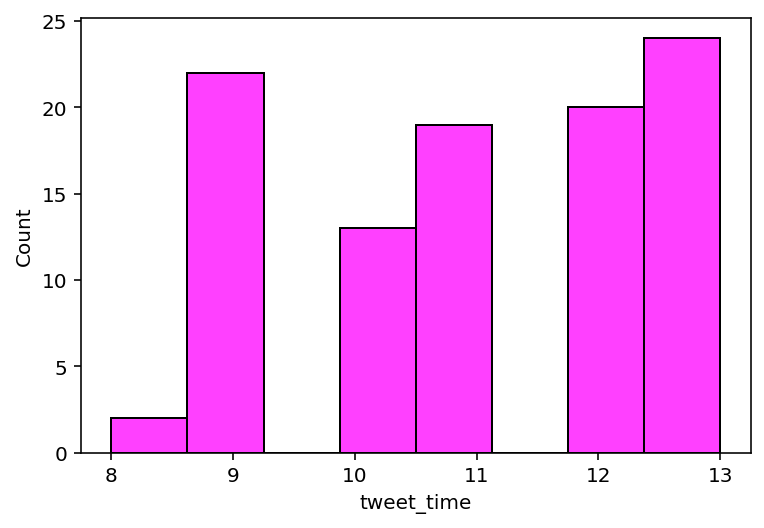

In [25]:
sns.histplot(df["tweet_time"], kde = False, color = "magenta");

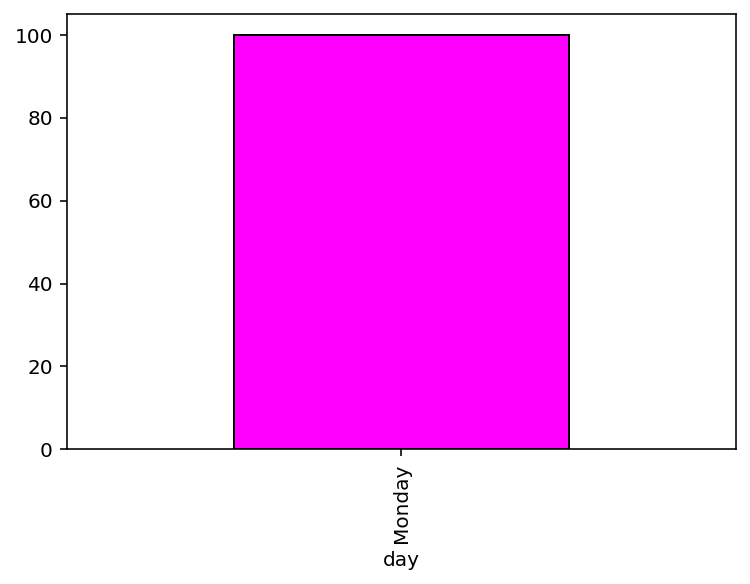

In [26]:
day_freq = df.groupby("day").count()["id"]
day_freq.plot.bar(x = "day", y = "id",color = "magenta", edgecolor="black");

We requested "recent" tweets. Therefore, they all belong to a single day. 

**Tweet Sending Platforms**

In [27]:
df.groupby("source").count()["id"]

source
Luf                     1
Paper.li                1
TweetDeck               3
Twitter Web App        26
Twitter for Android    28
Twitter for iPad        1
Twitter for iPhone     36
Xame1                   1
arx_ology               1
xamevuxa                1
xavuxame                1
Name: id, dtype: int64

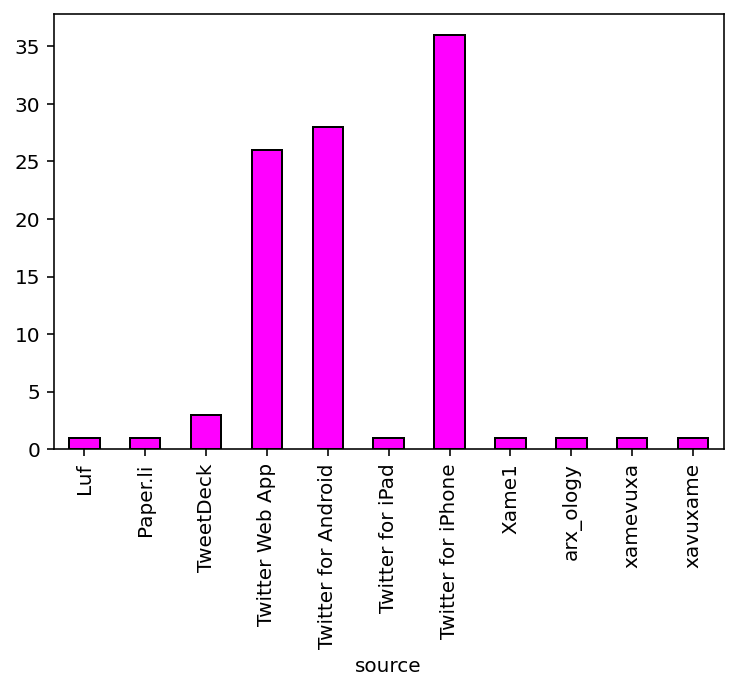

In [28]:
platform_freq = df.groupby("source").count()["id"]
platform_freq.plot.bar(x = "source", y = "id", color = "magenta", edgecolor="black");

### Text Mining

**Getting the Terms and their Frequencies**

In [29]:
# Upper-Lower Transformatiom
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

# Numbers
df['text'] = df['text'].str.replace('\d','')

# Stopwords 
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

# lemmatization

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

# Removing one- and two-letter entries
df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))

In [30]:
df["text"]

0     noah_lewis cody ware found way garage needed b...
1     fitstopperform would like congratulate rosscha...
2     talladega monday motivation rosschastain geico...
3     talladega thank talladega taking vulcan home r...
4     talladega retweet win one lucky fan could rece...
                            ...                        
95    talladega retweet win one lucky fan could rece...
96    talladega retweet well ride along johnny ray b...
97    talladega retweet win one lucky fan could rece...
98    talladega retweet win one lucky fan could rece...
99         talladega fun geico nascar httpstcoovyifmsxq
Name: text, Length: 100, dtype: object

In [31]:
df_tf= df["text"].str.split(" ", expand=True).melt()['value'].value_counts().reset_index()
df_tf.columns= ["word", "tf"]
df_tf

,word,tf
0,geico,92
1,talladega,72
2,nascar,41
3,lucky,20
4,retweet,20
...,...,...
296,fun,1
297,fault,1
298,served,1
299,left,1


**Plotting the Most Frequent Terms**

The most frequent words, measured here as having frequency larger than mean value plus std deviation:

In [32]:
most_freq = df_tf[df_tf.tf > df_tf.tf.mean() + df_tf.tf.std()]
most_freq

,word,tf
0,geico,92
1,talladega,72
2,nascar,41
3,lucky,20
4,retweet,20
5,fan,20
6,one,20
7,rosschastain,17
8,race,17
9,victory,16


Plot of the most frequent words:

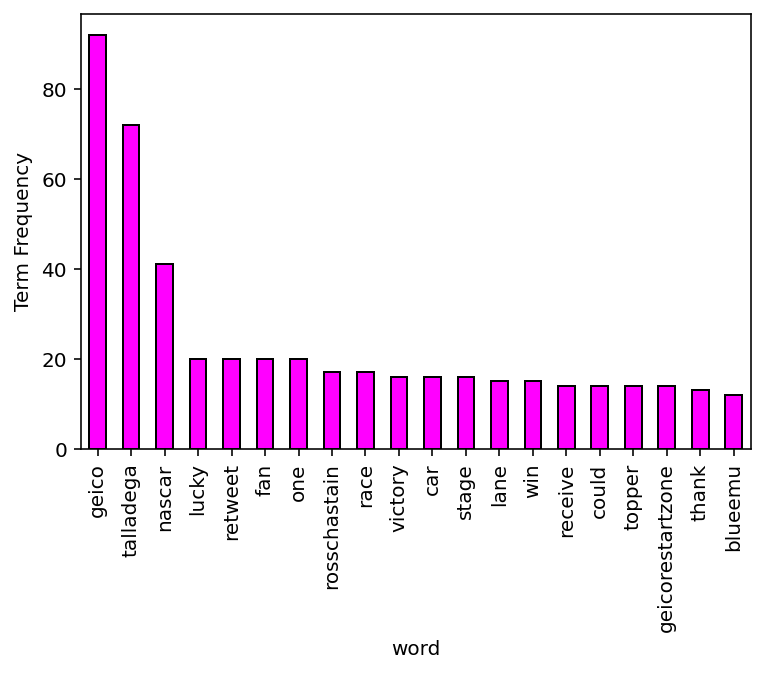

In [33]:
most_freq.plot.bar(x = "word",y = "tf",ylabel = "Term Frequency", legend = None,color = "magenta", edgecolor="black");

**Word Cloud**

Joining all terms:

In [34]:
text = " ".join(i for i in df.text)
text

'noah_lewis cody ware found way garage needed boy move tire nascar geico httpstcojl fitstopperform would like congratulate rosschastain moosefraternity teamtrackhouse winning httpstcotbxpkghs talladega monday motivation rosschastain geico httpstcoierxgiocqd talladega thank talladega taking vulcan home rosschastain geico teamtrackhouse httpstcokqrwls talladega retweet win one lucky fan could receive car topper geico victory lane geicorestartzone geico talladega thank talladega taking vulcan home rosschastain geico teamtrackhouse httpstcokqrwls pitoutsidebox weekend potb nascar prize throwback signed kurt busch trading card follow thecathybrown amp pitoutsideb pitoutsidebox weekend potb nascar prize throwback signed kurt busch trading card follow thecathybrown amp pitoutsideb thecathybrown nascar friend agpro geico talladega monday motivation rosschastain geico httpstcoierxgiocqd medium miscreant try absolve darrell wallace fault mrn wonderful interview httpstcocqcbzgqs talladega monday 

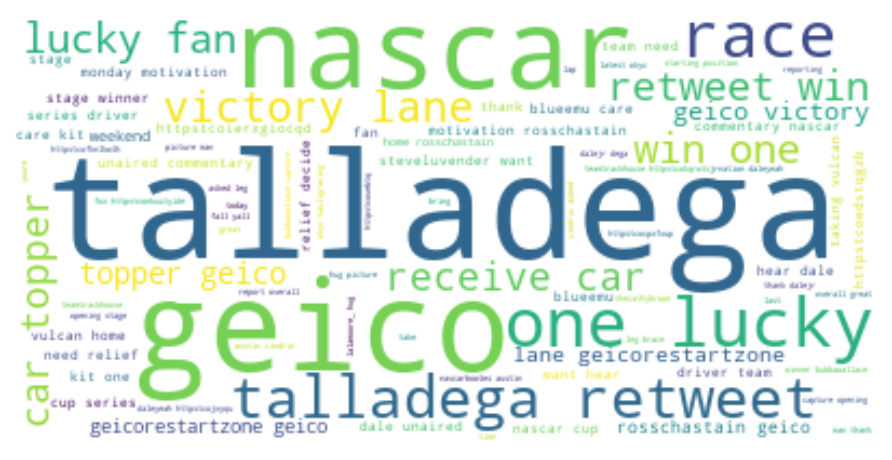

In [35]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Word Cloud on a Template:

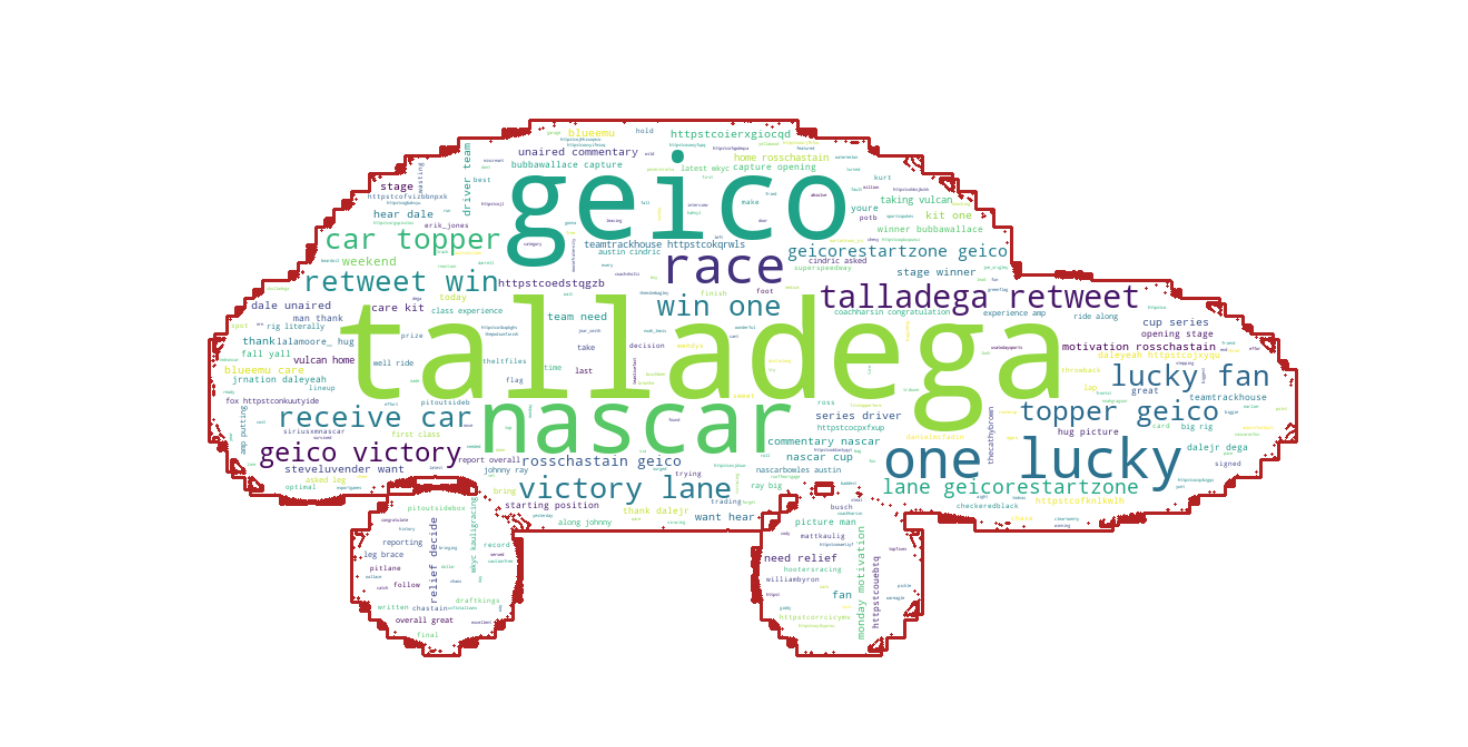

In [36]:
geico_mask = np.array(Image.open("CAR.jpg"))

wc = WordCloud(background_color = "white", 
              max_words = 1000, 
              mask = geico_mask,
              contour_width = 3, 
              contour_color = "firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Sentiment Analysis

In [37]:
def sentiment_score(df):
    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_score = textB.sentiment.polarity
        df.at[i, 'sentiment_score']=sentiment_score

        if sentiment_score <0.00:
            emotion_class = 'Negatif'
            df.at[i, 'emotion_class']=emotion_class

        elif sentiment_score >0.00:
            emotion_class = 'Pozitif'
            df.at[i, 'emotion_class']=emotion_class

        else:
            emotion_class = 'Notr'
            df.at[i, 'emotion_class']=emotion_class
            
    return df 

In [38]:
sentiment_score(df)

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time,day,sentiment_score,emotion_class
0,1518582828803502081,noah_lewis cody ware found way garage needed b...,2022-04-25 13:28:54+00:00,Twitter for iPhone,False,7,WhoisSkid,1012,"New York, USA","[{'text': 'NASCAR', 'indices': [104, 111]}, {'...",13,Monday,0.000000,Notr
1,1518582451798433792,fitstopperform would like congratulate rosscha...,2022-04-25 13:27:25+00:00,Twitter for iPhone,False,0,FitStopPerform,2115,"Huntersville, NC",[],13,Monday,0.500000,Pozitif
2,1518582066308435970,talladega monday motivation rosschastain geico...,2022-04-25 13:25:53+00:00,Twitter for Android,False,6,Jbriggsy_14,1583,"South Bend, IN","[{'text': 'GEICO500', 'indices': [53, 62]}]",13,Monday,0.000000,Notr
3,1518581785898201090,talladega thank talladega taking vulcan home r...,2022-04-25 13:24:46+00:00,Twitter for iPhone,False,80,LszlPti,108,"Budapest, Magyarország","[{'text': 'GEICO500', 'indices': [91, 100]}]",13,Monday,0.000000,Notr
4,1518581717451218947,talladega retweet win one lucky fan could rece...,2022-04-25 13:24:29+00:00,Twitter for Android,False,641,catbogan02,26,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'...",13,Monday,0.566667,Pozitif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1518518882700472320,talladega retweet win one lucky fan could rece...,2022-04-25 09:14:49+00:00,Xame1,False,641,xamexavu,567,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'...",9,Monday,0.566667,Pozitif
96,1518517176550014976,talladega retweet well ride along johnny ray b...,2022-04-25 09:08:02+00:00,Twitter for iPhone,False,149,stephenbyers5,41,,"[{'text': 'GEICO500', 'indices': [101, 110]}]",9,Monday,0.000000,Notr
97,1518517173894795264,talladega retweet win one lucky fan could rece...,2022-04-25 09:08:01+00:00,arx_ology,False,641,rilufix,279,,"[{'text': 'GEICO500', 'indices': [84, 93]}, {'...",9,Monday,0.566667,Pozitif
98,1518511225495330817,talladega retweet win one lucky fan could rece...,2022-04-25 08:44:23+00:00,Twitter Web App,False,641,SheaBalentine,1538,"Savannah, TN","[{'text': 'GEICO500', 'indices': [84, 93]}, {'...",8,Monday,0.566667,Pozitif


In [39]:
df.groupby("emotion_class").count()["id"]

emotion_class
Notr       59
Pozitif    41
Name: id, dtype: int64

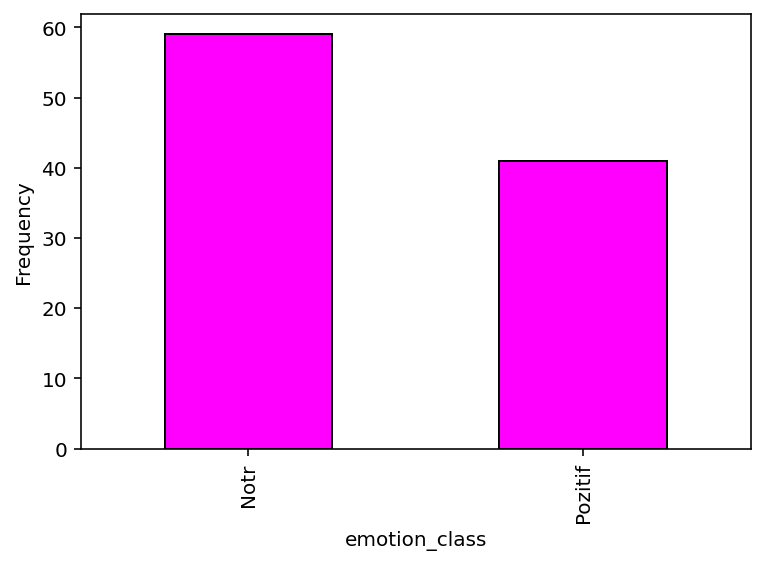

In [40]:
emotion_freq = df.groupby("emotion_class").count()["id"]
emotion_freq.plot.bar(x = "emotion_class",y = "id", ylabel = "Frequency",color="magenta", edgecolor="black");